<a href="https://colab.research.google.com/github/MatGam3r/PrimerGitTest/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

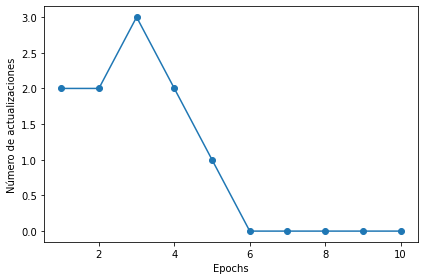

In [ ]:
import numpy as np
 
class Perceptron:
    """Clasificador Perceptron basado en la descripción del libro
    "Python Machine Learning" de Sebastian Raschka.
 
    Parametros
    ----------
 
    eta: float Tasa de aprendizaje.
    n_iter: int Pasadas sobre el dataset.
 
    Atributos
    ---------
    w_: array-1d
        Pesos actualizados después del ajuste
    errors_: list
        Cantidad de errores de clasificación en cada pasada
     """
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
 
    def fit(self, X, y):
        """Ajustar datos de entrenamiento
 
        Parámetros
        ----------
        X:  array like, forma = [n_samples, n_features]
            Vectores de entrenamiento donde n_samples es el número de muestras y
            n_features es el número de carácteristicas de cada muestra.
        y:  array-like, forma = [n_samples].
            Valores de destino
 
        Returns
        -------
        self:   object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
 
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) #actualizacion de predicción
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
 
    def predict(self, X):
        """Devolver clase usando función escalón de Heaviside.
        phi(z) = 1 si z >= theta; -1 en otro caso
        """
        phi = np.where(self.net_input(X) >= 0.0, 1, -1)
        return phi
 
    def net_input(self, X):
        """Calcular el valor z (net input)"""
        # z = w · x + theta
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        return z

import pandas as pd
import matplotlib.pyplot as plt
 
# Cargamos el dataset
df = pd.read_csv("iris.data", header=None)

# extraemos el largo sepal y el largo del pétalo en las columnas 0 y 2. Usaremos solo Setosa y Versicolor
X = df.iloc[0:100, [0, 2]].values #convertimos de strimg a valores numericos
# Seleccionamos Setosa y Versicolor.
y = df.iloc[0:100, 4].values # y es valores del 0 a 100 de la columna 4, son nuestras clases
print(y)
y = np.where(y == 'Iris-setosa', -1, 1) # lo llevamos al lenguaje del perceptron convertimos setosa en valor -1, el resto +1
print(y) 
# Inicializamos el perceptron
ppn = Perceptron(eta=0.1, n_iter=10) #eta (rata de aprendizaje) valor de aprendizaje de 0.1, se recomeinda pequeña, las iteraciones son 10
 
# Lo entrenamos con los vectores X e y
ppn.fit(X, y)  #linea de aprendizaje del Perceptron () (las iteraciones son nuestras epocas) 

# Graficamos el número de errores en cada iteración
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de actualizaciones')
plt.tight_layout()
plt.show()

Podemos ver que la epoca 6 (iteraccion 6) es el punto de menor menor mas simple.
